# Project:Advanced Statistics

# Importing the Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Loading the dataset CSV file

In [3]:
df=pd.read_csv('C:\\Users\\srivi\\Downloads\\SalaryData.csv')

# Checking the top 5 records

In [4]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


# Checking the shape and information of the dataframe

In [5]:
df.shape

(40, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


# Checking the summary of the dataframe

In [6]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


# Checking for missing values

In [8]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

# Checking distinct values of Education and Occupation

In [9]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [10]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

# Creating Point plots

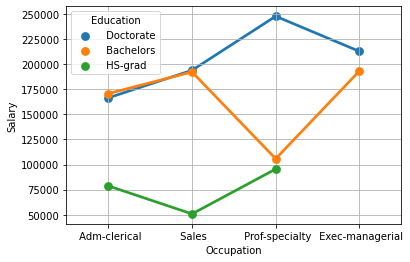

In [11]:
sns.pointplot(x='Occupation',y='Salary',data=df,hue='Education',ci=None)
plt.grid()
plt.show()

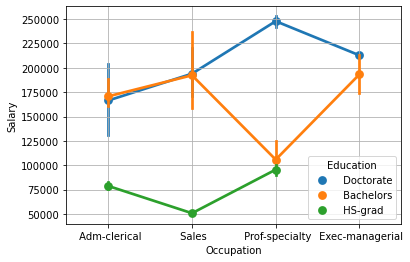

In [15]:
sns.pointplot(x='Occupation',y='Salary',data=df,hue='Education')
plt.grid()
plt.show()

Looking at above boxplot of preweight and weight6weeks, we can observe that there is a change in the weights

# Formulate the hypothesis of the One-way ANOVA of 'Education' variable with variable 'Salary'.

$H_0$ : Salary depends on the Education Qualification

$H_1$ :Salary does not depends on Education Qualification

# One-way ANOVA with the 'Education' variable.

In [16]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis ($H_0$).

# Formulate the hypothesis of the One-way ANOVA of 'Occupation' variable with the 'Salary' variable.

$H_0$ : Salary Depends upon Occcupation

$H_1$ : Salary does not depends upon Occupation

# One-way ANOVA with the 'Occupation' variable.

In [17]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis ($H_0$).

# Formulate the hypothesis of ANOVA with both 'Education' and 'Occupation' variables with respect to the variable 'Salary'.

$H_0$ : The means of 'Salary' variable with respect to each Education category and Occupation is equal.

$H_1$ : At least one of the means of 'Salary' variable with respect to each Education category and Occupation is unequal.

# ANOVA with both 'Education' and 'Occupation' variables with respect to the variable 'Salary'.

In [18]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


Considering both the factors(Education and Occupation), Education is a significant factor as the p value is <0.05 wheras Occupation is not a significant variable as p value of diet is >0.05

# Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables. 

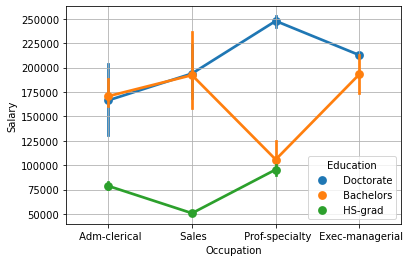

In [19]:
sns.pointplot(x='Occupation',y='Salary',data=df,hue='Education')
plt.grid()
plt.show()

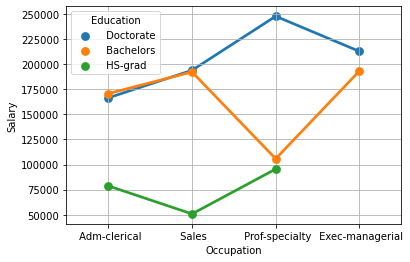

In [20]:
sns.pointplot(x='Occupation',y='Salary',data=df,hue='Education',ci= None)
plt.grid()
plt.show()

As seen from the above two interaction plots, there seems to be very less or almost no interaction amongst the two categorical variables.

# Problem 2

In [4]:
df1=pd.read_csv('C:\\Users\\srivi\\Downloads\\Education+-+Post+12th+Standard.csv')

In [60]:
df1.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [42]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [26]:
df1.shape

(777, 18)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [44]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [47]:
df1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [43]:
dups = df1.duplicated()
dups
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Education,Occupation,Salary


Text(0.5, 1.0, 'Top10perc Distribution')

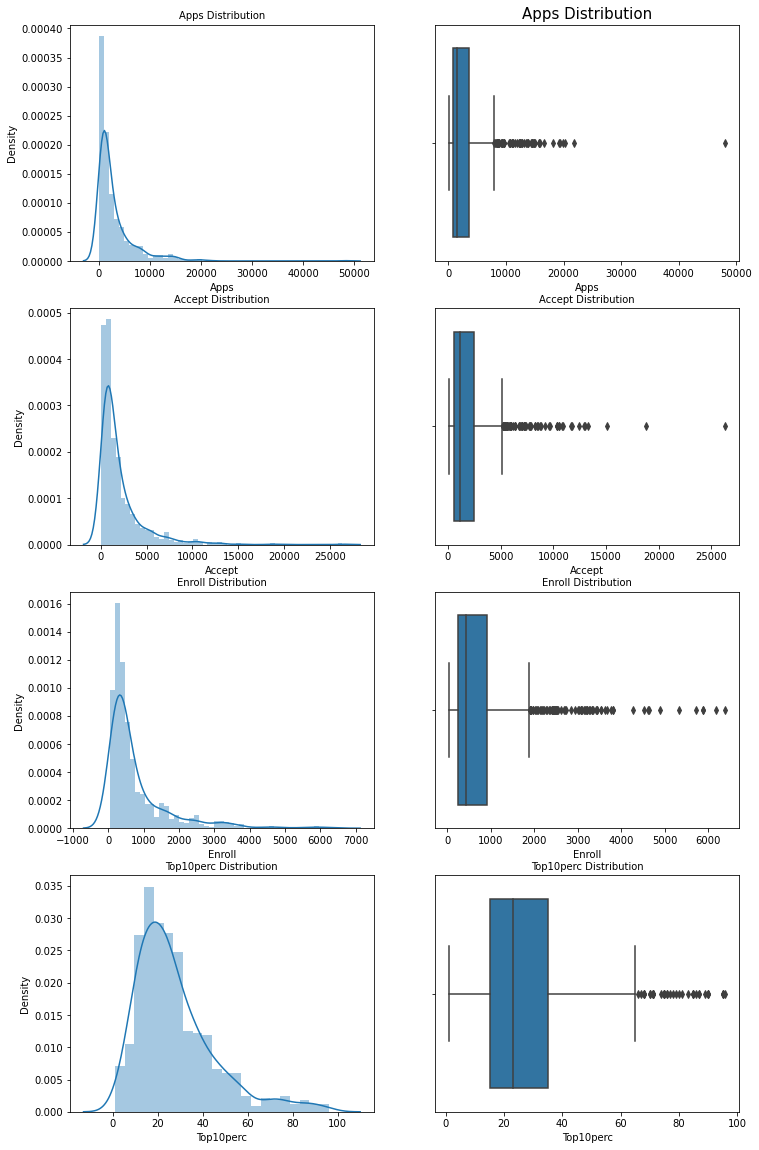

In [45]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=10)
a = sns.boxplot(df1['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(df1['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=10)

a = sns.boxplot(df1['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=10)

a = sns.distplot(df1['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.boxplot(df1['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.distplot(df1['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=10)

a = sns.boxplot(df1['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=10)

Text(0.5, 1.0, 'Outstate Distribution')

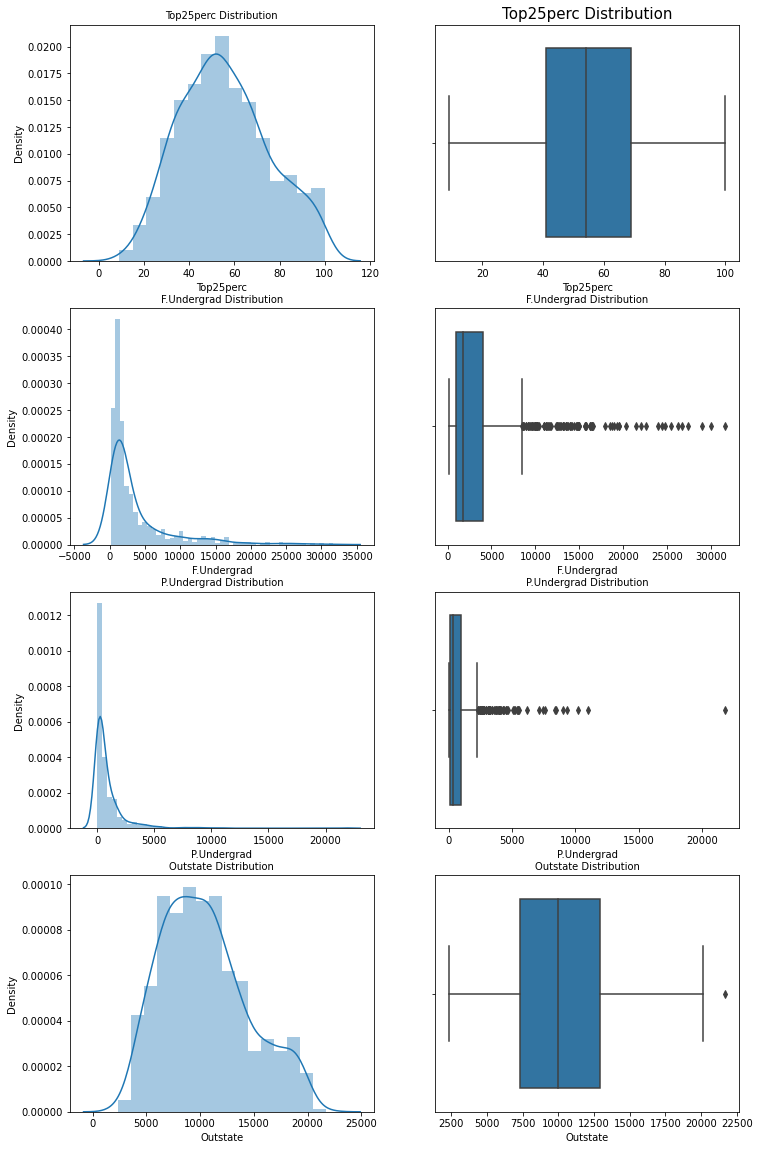

In [46]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=10)

a = sns.boxplot(df1['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(df1['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.boxplot(df1['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.distplot(df1['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.boxplot(df1['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.distplot(df1['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=10)

a = sns.boxplot(df1['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=10)

Text(0.5, 1.0, 'PhD Distribution')

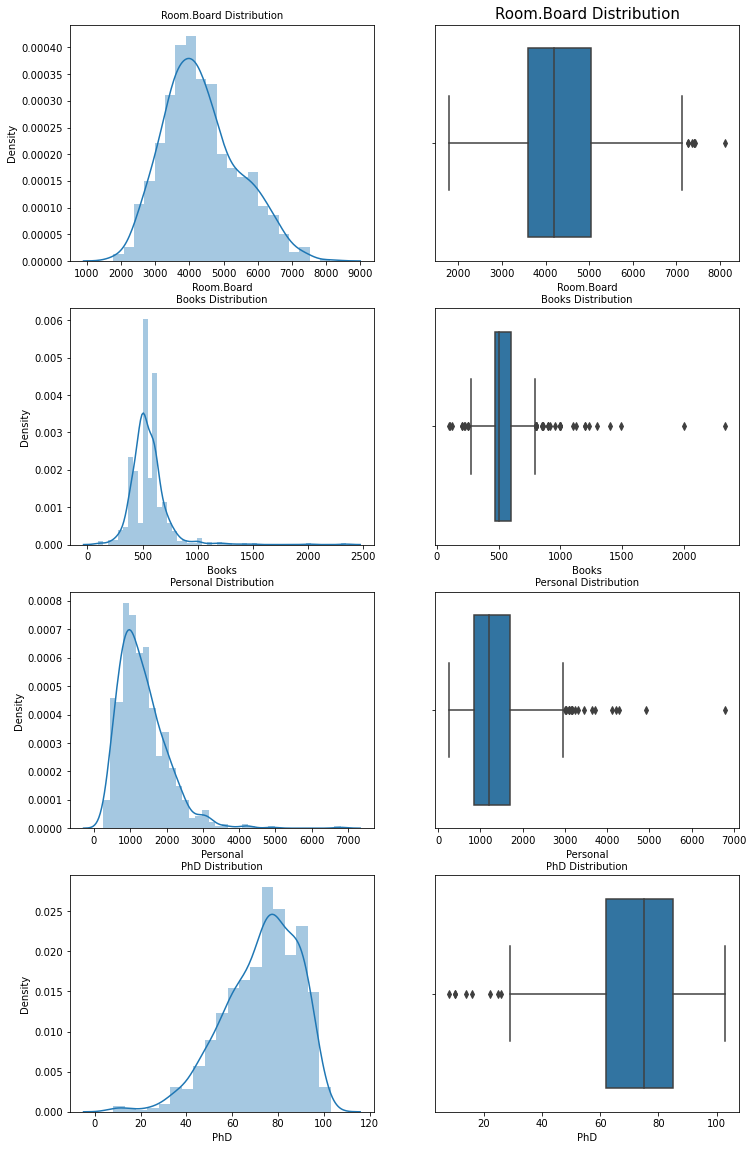

In [47]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=10)

a = sns.boxplot(df1['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(df1['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=10)

a = sns.boxplot(df1['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=10)

a = sns.distplot(df1['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=10)

a = sns.boxplot(df1['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=10)

a = sns.distplot(df1['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=10)

a = sns.boxplot(df1['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=10)

Text(0.5, 1.0, 'Grad.Rate Distribution')

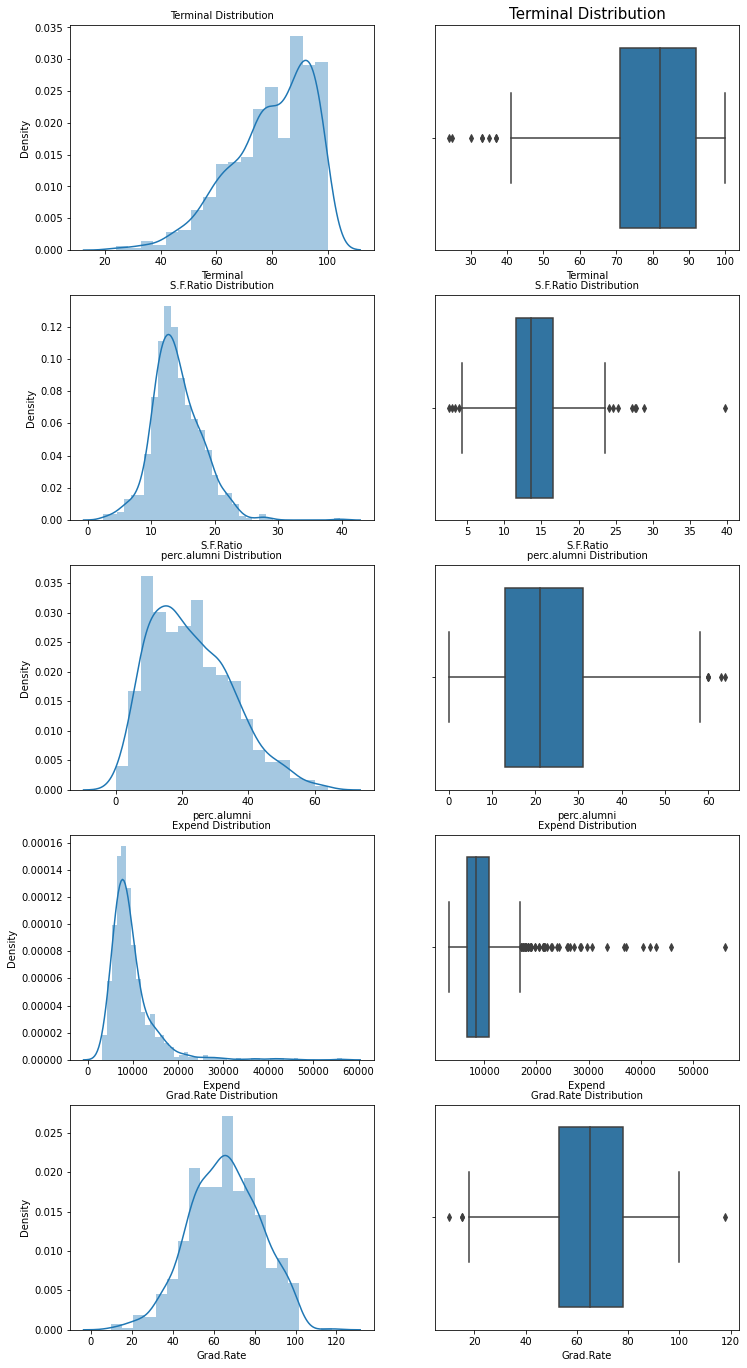

In [48]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 24)
a = sns.distplot(df1['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=10)

a = sns.boxplot(df1['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(df1['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.boxplot(df1['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.distplot(df1['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.boxplot(df1['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.distplot(df1['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=10)

a = sns.boxplot(df1['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=10)

a = sns.distplot(df1['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=10)

a = sns.boxplot(df1['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=10)

In [9]:
df1_1 = df1.corr()
df1_1

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<AxesSubplot:>

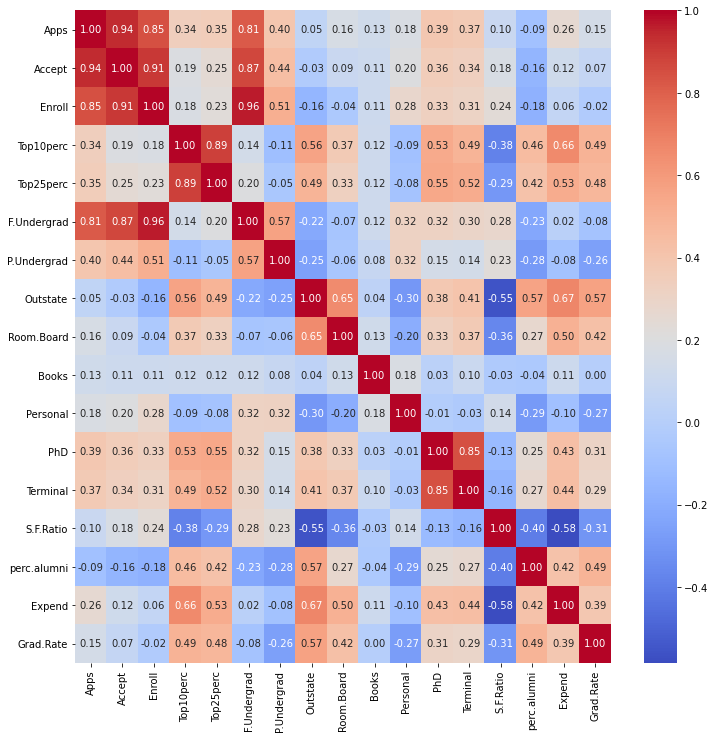

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_1, annot=True, fmt = '.2f', cmap='coolwarm')

In [12]:
df1_1 = df1.drop(['Names'], axis =1)
from scipy.stats import zscore
df1_z=df1_1.apply(zscore)
df1_z.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [13]:
cov_matrix = np.cov(df1_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [14]:
df1_z1 = df1_z.corr()
df1_z1

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<AxesSubplot:>

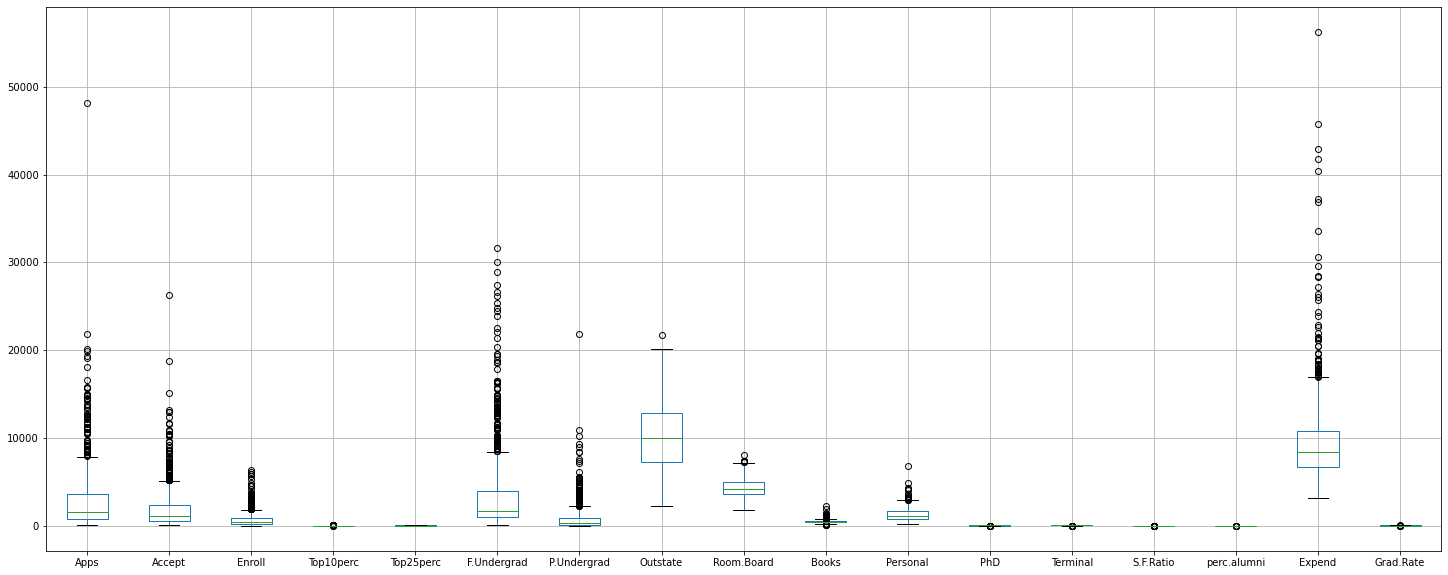

In [15]:
df1.boxplot(figsize=(25,10))

<AxesSubplot:>

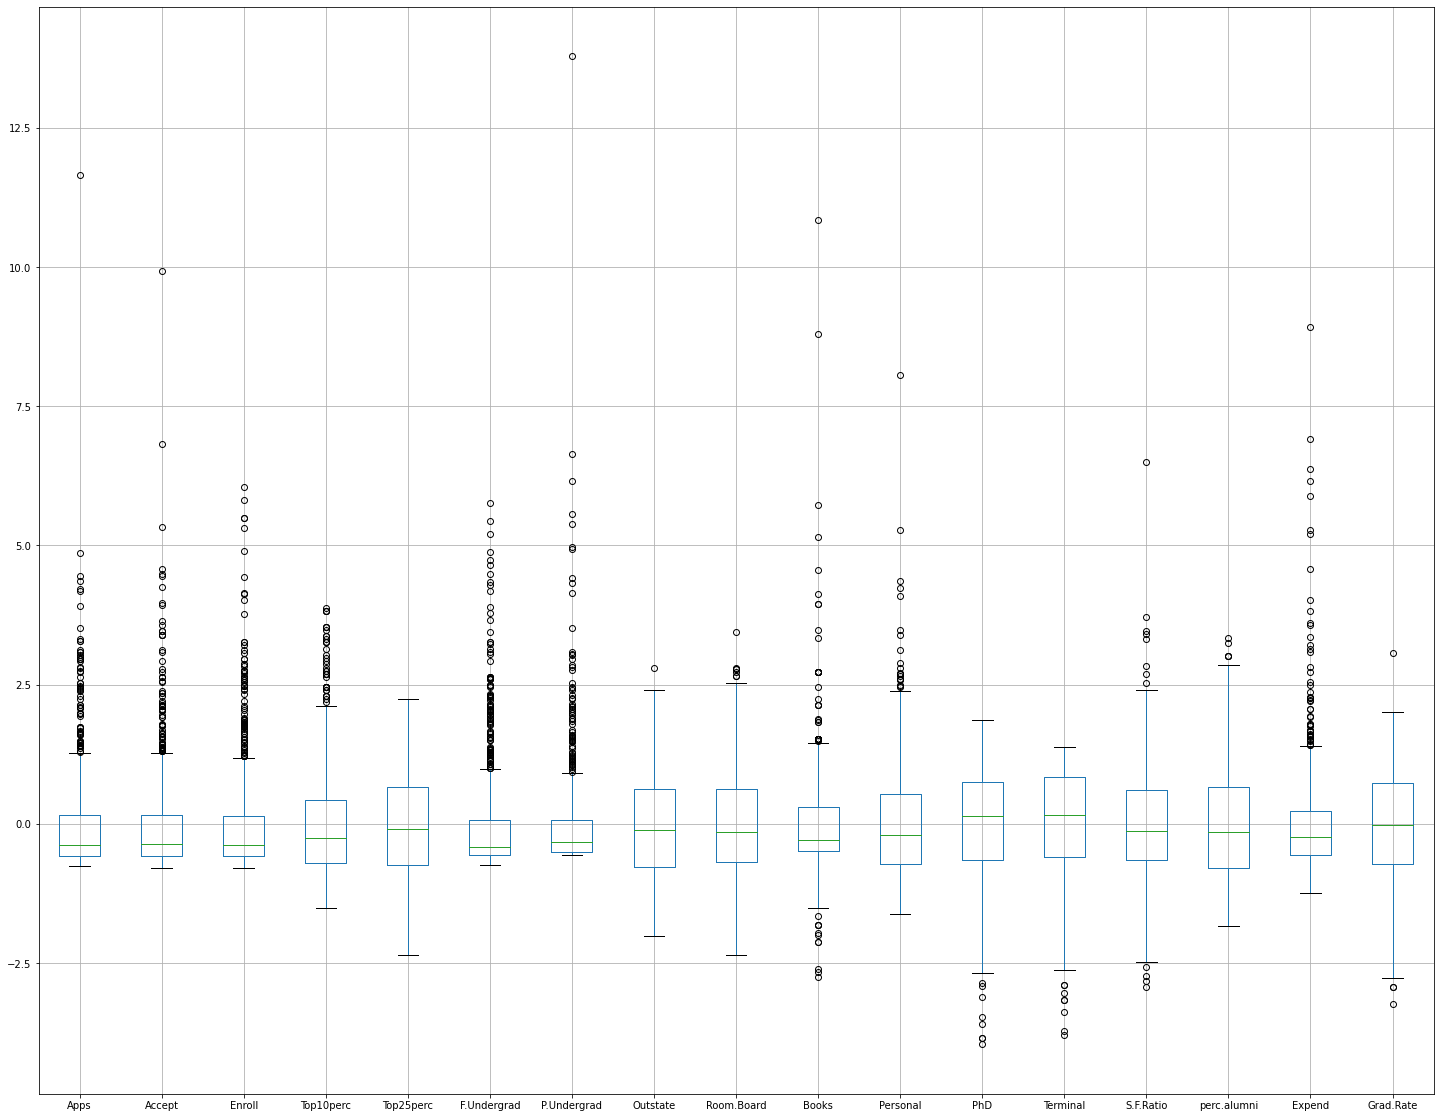

In [16]:
df1_z.boxplot(figsize=(25,20))

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
lratio,uratio=remove_outlier(df1['Apps'])
df1['Apps']=np.where(df1['Apps']>uratio,uratio,df1['Apps'])
df1['Apps']=np.where(df1['Apps']<lratio,lratio,df1['Apps'])

lratio,uratio=remove_outlier(df1['Accept'])
df1['Accept']=np.where(df1['Accept']>uratio,uratio,df1['Accept'])
df1['Accept']=np.where(df1['Accept']<lratio,lratio,df1['Accept'])

lratio,uratio=remove_outlier(df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']>uratio,uratio,df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']<lratio,lratio,df1['Enroll'])

lratio,uratio=remove_outlier(df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']>uratio,uratio,df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']<lratio,lratio,df1['Top10perc'])

lratio,uratio=remove_outlier(df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']>uratio,uratio,df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']<lratio,lratio,df1['F.Undergrad'])

lratio,uratio=remove_outlier(df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']>uratio,uratio,df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']<lratio,lratio,df1['P.Undergrad'])

lratio,uratio=remove_outlier(df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']>uratio,uratio,df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']<lratio,lratio,df1['Room.Board'])

lratio,uratio=remove_outlier(df1['Books'])
df1['Books']=np.where(df1['Books']>uratio,uratio,df1['Books'])
df1['Books']=np.where(df1['Books']<lratio,lratio,df1['Books'])

lratio,uratio=remove_outlier(df1['Personal'])
df1['Personal']=np.where(df1['Personal']>uratio,uratio,df1['Personal'])
df1['Personal']=np.where(df1['Personal']<lratio,lratio,df1['Personal'])

lratio,uratio=remove_outlier(df1['PhD'])
df1['PhD']=np.where(df1['PhD']>uratio,uratio,df1['PhD'])
df1['PhD']=np.where(df1['PhD']<lratio,lratio,df1['PhD'])

lratio,uratio=remove_outlier(df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']>uratio,uratio,df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']<lratio,lratio,df1['Terminal'])

lratio,uratio=remove_outlier(df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']>uratio,uratio,df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']<lratio,lratio,df1['S.F.Ratio'])

lratio,uratio=remove_outlier(df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']>uratio,uratio,df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']<lratio,lratio,df1['perc.alumni'])

lratio,uratio=remove_outlier(df1['Expend'])
df1['Expend']=np.where(df1['Expend']>uratio,uratio,df1['Expend'])
df1['Expend']=np.where(df1['Expend']<lratio,lratio,df1['Expend'])

lratio,uratio=remove_outlier(df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']>uratio,uratio,df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']<lratio,lratio,df1['Grad.Rate'])

<AxesSubplot:>

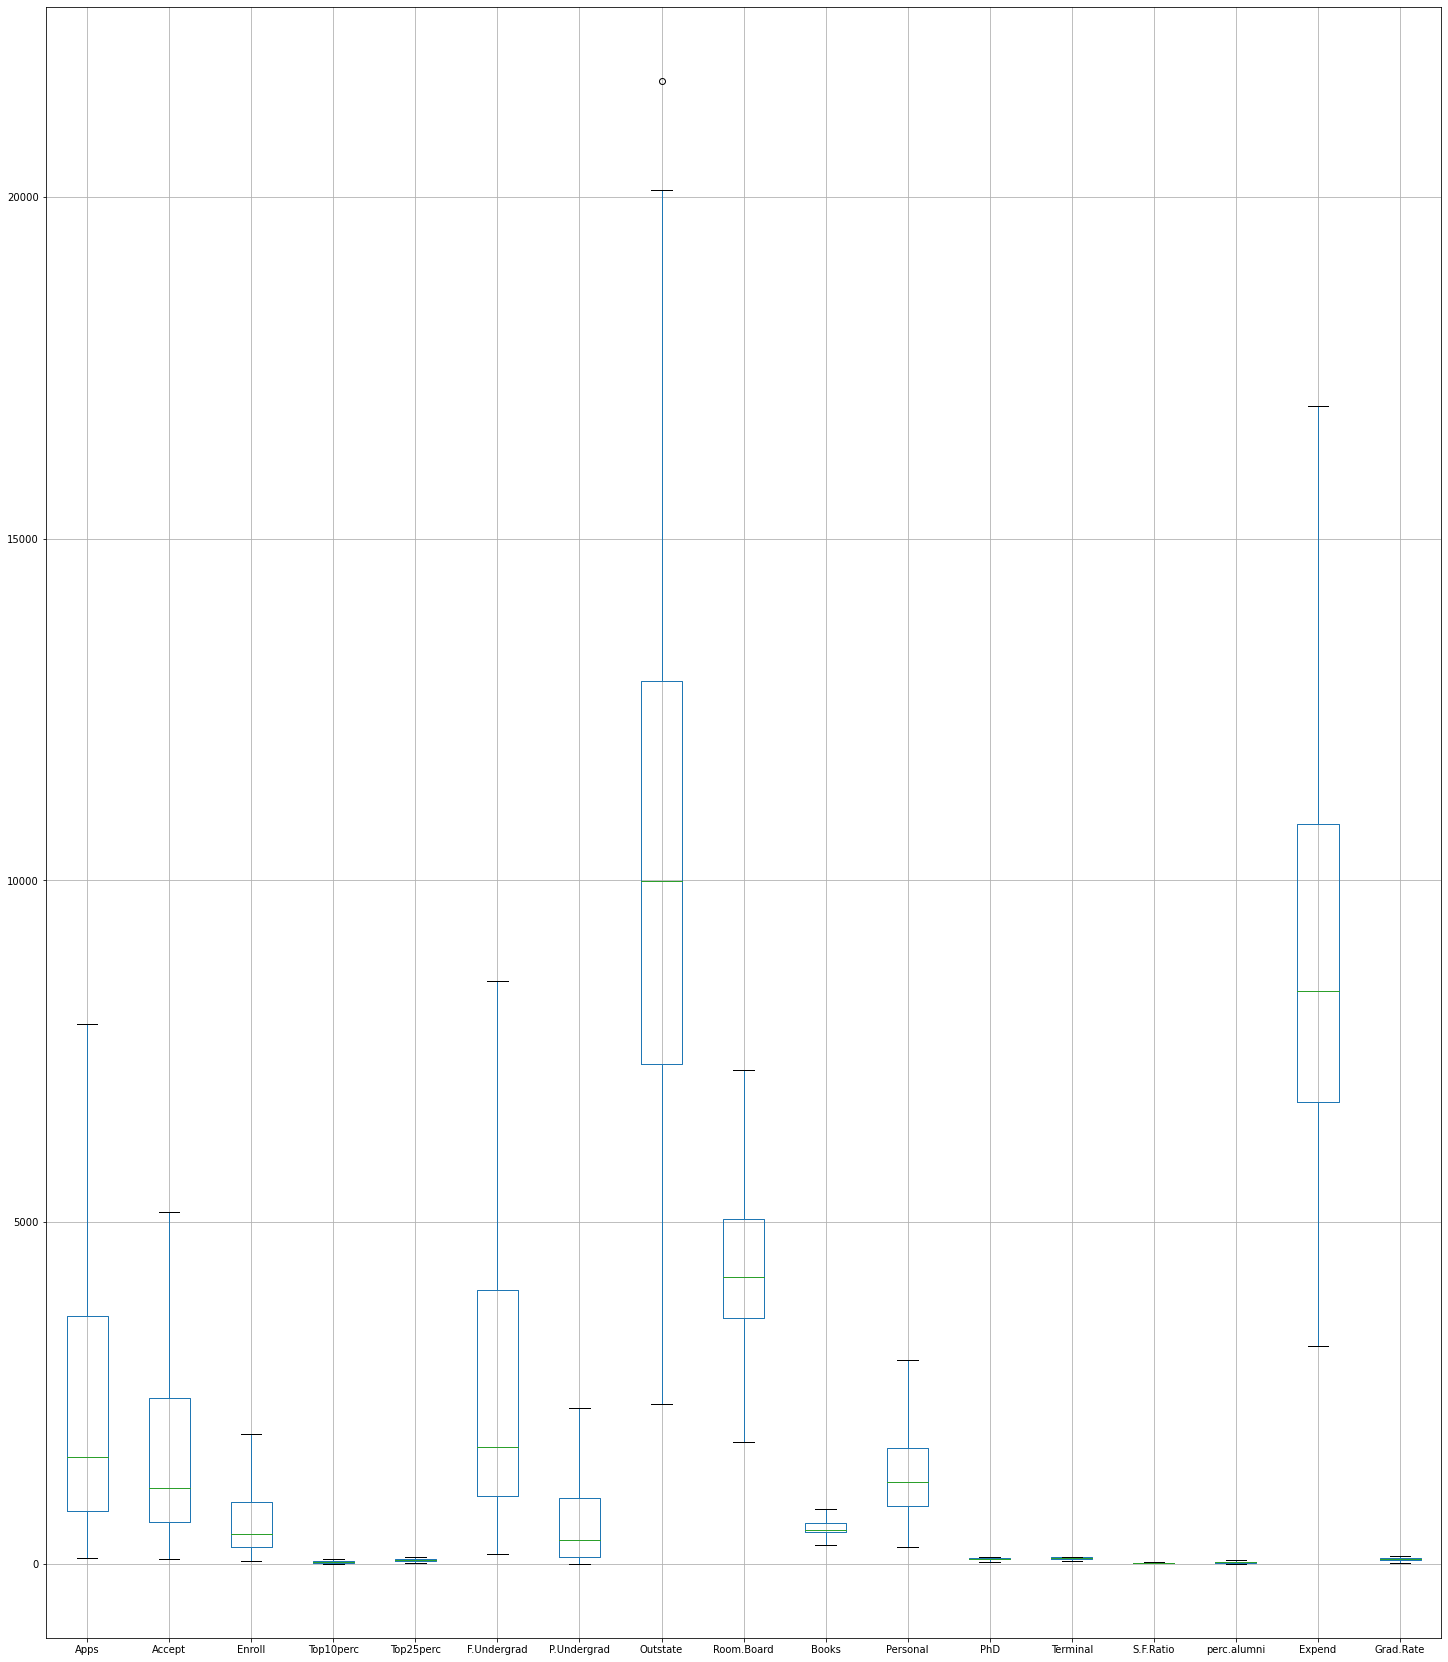

In [24]:
plt.subplots(figsize=(25,30))
df1.boxplot(figsize=(25,20))

In [25]:
from scipy.stats import zscore
df1_z=df1_1.apply(zscore)
df1_z.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [26]:
df1_z.T

,0,1,2,3,4,5,6,7,8,9,...,767,768,769,770,771,772,773,774,775,776
Apps,-0.346882,-0.210884,-0.406866,-0.668261,-0.726176,-0.624307,-0.684808,-0.285088,-0.507700,-0.625600,...,-0.176238,-0.736777,-0.264404,-0.387991,-0.060407,-0.208040,-0.269575,-0.233895,1.991711,-0.003268
Accept,-0.321205,-0.038703,-0.376318,-0.681682,-0.764555,-0.628611,-0.685356,-0.121984,-0.481644,-0.620854,...,-0.087284,-0.771903,-0.114227,-0.442453,0.120511,-0.205673,-0.087284,-0.042377,0.177256,-0.066872
Enroll,-0.063509,-0.288584,-0.478121,-0.692427,-0.780735,-0.669812,-0.729043,-0.313353,-0.595505,-0.654735,...,-0.011817,-0.759196,-0.220739,-0.545967,-0.105509,-0.255200,-0.091509,-0.091509,0.578333,-0.095816
Top10perc,-0.258583,-0.655656,-0.315307,1.840231,-0.655656,0.592287,-0.598931,0.535563,0.138490,-0.372032,...,-0.201858,-0.598931,0.819186,1.329708,1.216259,-1.336352,-0.201858,0.365389,3.825595,0.025041
Top25perc,-0.191827,-1.353911,-0.292878,1.677612,-0.596031,0.313426,-0.545505,0.616579,0.363952,-0.596031,...,0.262901,-0.747607,0.616579,1.374460,1.526036,-1.505488,-0.444454,0.262901,2.182866,0.363952
F.Undergrad,-0.168116,-0.209788,-0.549565,-0.658079,-0.711924,-0.623421,-0.677472,-0.434450,-0.562562,-0.598459,...,-0.062903,-0.705116,-0.354818,-0.544820,-0.185239,-0.126030,-0.175543,-0.187095,0.312977,-0.146867
P.Undergrad,-0.209207,0.244307,-0.497090,-0.520752,0.009005,-0.535212,-0.410988,-0.541127,-0.361036,-0.510893,...,-0.121791,-0.547700,-0.467513,-0.539812,-0.505635,0.771435,0.165435,-0.453053,-0.507606,0.572283
Outstate,-0.746356,0.457496,0.201305,0.626633,-0.716508,0.760947,0.708713,0.852479,1.282036,0.006798,...,-1.005035,-0.333464,1.369837,0.556988,1.353919,-0.906289,0.268462,-0.880670,2.337894,-1.355744
Room.Board,-0.964905,1.909208,-0.554317,0.996791,-0.216723,-0.932970,1.243144,0.427443,0.038754,-0.891911,...,-0.880962,-0.599938,0.042403,-0.189351,0.923798,-0.417455,0.549707,-0.143730,1.963953,-0.727676
Books,-0.602312,1.215880,-0.905344,-0.602312,1.518912,-0.299280,-0.299280,-0.602312,-1.511408,0.670422,...,0.185571,-0.299280,-0.905344,0.337087,-0.117461,-0.299280,0.306784,0.409815,0.488603,-0.299280


In [27]:
cov_matrix = np.cov(df1_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [28]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.48765602e-01  3.31598227e-01 -6.30921033e-02  2.81310530e-01
  -5.74140964e-03 -1.62374420e-02 -4.24863486e-02 -1.03090398e-01
  -9.02270802e-02  5.25098025e-02 -3.58970400e-01  4.59139498e-01
  -4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [ 2.07601502e-01  3.72116750e-01 -1.01249056e-01  2.67817346e-01
  -5.57860920e-02  7.53468452e-03 -1.29497196e-02 -5.62709623e-02
  -1.77864814e-01  4.11400844e-02  5.43427250e-01 -5.18568789e-01
   5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [ 1.76303592e-01  4.03724252e-01 -8.29855709e-02  1.61826771e-01
   5.56936353e-02 -4.25579803e-02 -2.76928937e-02  5.86623552e-02
  -1.28560713e-01  3.44879147e-02 -6.09651110e-01 -4.04318439e-01
   6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [ 3.54273947e-01 -8.24118211e-02  3.50555339e-02 -5.15472524e-02
   3.95434345e-01 -5.26927980e-02 -1.61332069e-01 -1.22678028e-01
 

In [33]:
pca = PCA(n_components=17)
X_pca= pca.fit_transform(df1_z)

In [34]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [36]:
df1_z.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [37]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [38]:
print('The Linear eq of 1st component: ')
for i in range(0,df1_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),df1_z.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.249 * Apps + 0.208 * Accept + 0.176 * Enroll + 0.354 * Top10perc + 0.344 * Top25perc + 0.155 * F.Undergrad + 0.026 * P.Undergrad + 0.295 * Outstate + 0.249 * Room.Board + 0.065 * Books + -0.043 * Personal + 0.318 * PhD + 0.317 * Terminal + -0.177 * S.F.Ratio + 0.205 * perc.alumni + 0.319 * Expend + 0.252 * Grad.Rate + 

In [39]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

In [41]:
pca = PCA(n_components=5)
X_pca= pca.fit_transform(df1_z)

In [42]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309214, -0.10124902, -0.08298551,  0.03505554, -0.02414794,
        -0.06139305,  0.13968172,  0.04659886,  0.14896739,  0.67741165,
         0.49972112, -0.12702838, -0.06603754, -0.2898484 , -0.14698927,
         0.22674399, -0.20806465],
       [ 0.28131055,  0.26781733,  0.16182673, -0.05154726, -0.10976654,
         0.10041239, -0.15855849,  0.13129137,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

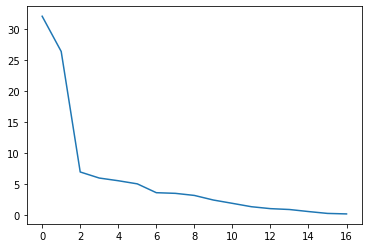

In [43]:
plt.plot(var_exp)

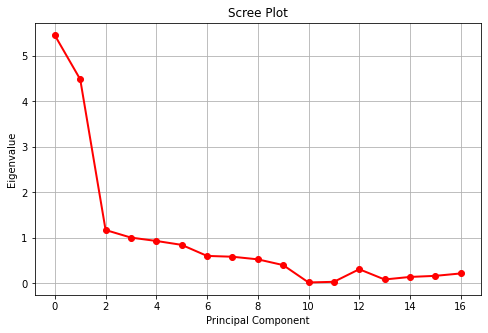

In [44]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(df1_z.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [45]:
df2_comp = pd.DataFrame(pca.components_,columns=list(df1_z))
df2_comp

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005742,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268


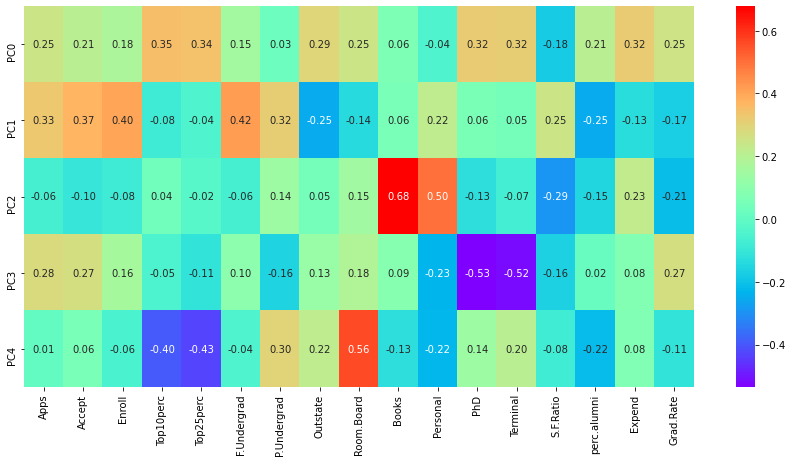

In [46]:
plt.figure(figsize= (15,7))
sns.heatmap(df2_comp, cmap= 'rainbow', annot = True, fmt = '.2f', yticklabels= ['PC0', 'PC1', 'PC2', 'PC3','PC4'])
plt.show()

# END

###### Note: $\underline{Definition}$ of  a concomitant variable, or covariate, is a variable which we observe during the course of our research or statistical analysis, but we cannot control it and it is not the focus of our analysis.

Here, preweight is a concomitant variable.